In [2]:
"""
[活性化関数]
閾値を境にして出力が切り替わる関数である.
パーセプトロンは, 活性化関数にステップ関数を利用している.
ニューラルネットワークでよく用いられる活性化関数はシグモイド関数である.

[シグモイド関数(sigmoid function)]
ニューラルネットワークでは活性化関数にシグモイド関数を用いて信号の変換を行い, その変換された信号が次のニューロンに伝えられる.
シグモイド関数は以下の式で表される.

h(x) = 1/(1 + exp(-x))

exp(-x)はe^-xを意味する.
eはネイピア数.
"""
pass

In [3]:
import numpy as np

# ステップ関数
def step_function(x):
    y = x > 0
    return y.astype(np.int)

step_function(np.array([-1, 1, 2]))

array([0, 1, 1])

In [4]:
# ステップ関数のグラフ
# ステップ関数は閾値で出力が変わる

import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

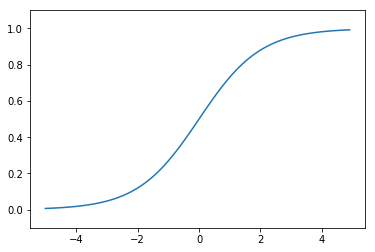

In [5]:
"""
シグモイド関数のグラフ

シグモイド関数は0か1ではなく, 連続的な実数を返す.

ステップ関数と同様に, 入力が大きいほど1に近づき, 小さいほど0に近づく.
入力信号にかかわらず, 0から1の値を出力することも両者の共通点である.

ステップ関数もシグモイド関数も非線形関数である.
パーセプトロンやニューラルネットワークのように, 複数の層を重ねる場合, 活性化関数に非線形関数を使わなければ意味がない.
複数の線形関数は1つの関数で表せるため.
"""

# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # numpyのブロードキャスト機能により, 配列にも対応

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

In [6]:
"""
[ReLU(Rectified Linear Unit)]
シグモイド関数以外で, ニューラルネットワークで使われる関数
ReLUは入力が0を超えていれば, その入力をそのまま出し, 0以下である場合は0を出力する.
"""

def relu(x):
    return np.maximum(0, x)

In [7]:
"""
[行列(matrix)]
2次元配列のことを行列と呼ぶ.
"""
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape) # 3 * 2の配列(最初が0番目の次元, つまり縦の行数)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [8]:
"""
行列の積

行列の積は, 左側の行と, 右側の行の間の積と和によって計算される.
行列の積は, 左側の行列の1次元目の要素数(列数)と, 右側の行列の要素数(行数)を同じ値にする必要がある.

[np.dot()関数]
ドット積(・)を行う関数
1次元配列の場合はベクトルを, ２次元配列では行列の積を計算する.
"""

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [9]:
"""
ニューラルネットワークの行列の積
"""
X = np.array([1, 2]) # 入力
print("X =", X)
X.shape
W = np.array([[1, 3, 5], [2, 4, 6]]) # 重み
print("W =", W)
W.shape
Y = np.dot(X, W) # 出力
print("Y =", Y)

X = [1 2]
W = [[1 3 5]
 [2 4 6]]
Y = [ 5 11 17]


In [10]:
"""
3層ニューラルネットワークの実装
"""
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 


#####################
# 第１層の重み付きの和を計算する
#####################
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 1行目はx[0]の重み, 2行目はx[1]の重み
B1 = np.array([0.1, 0.2, 0.3]) # バイアス

print("W1 shape =", W1.shape)
print("X shape =", X.shape)
print("B1 shape =", B1.shape)

# 第一層目の重み付き和　＝ A1 = XW1 + B1
A1 = np.dot(X, W1) + B1
print("A1 =", A1)

# 活性化関数にシグモイド関数を利用
Z1 = sigmoid(A1)
print("第一層目の出力 = Z1 =", Z1)

#####################
# 第１層から第２層までの実装
#####################
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # 1行目はz1[0], 2行目はz1[1], 3行目はz1[2]の重み
B2 = np.array([0.1, 0.2]) # バイアス

print(Z1.shape) #  (3, )
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print("第二層目の出力 = Z2 =", Z2)

#####################
# 第2層から第3層までの実装
#####################
# 最後の活性化関数はシグモイドを使わない
# 入力をそのまま出力する関数を恒等関数と呼ぶ
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # もしくは Y = A3
print("第三層目の出力 = Y =", Y)


W1 shape = (2, 3)
X shape = (2,)
B1 shape = (3,)
A1 = [0.3 0.7 1.1]
第一層目の出力 = Z1 = [0.57444252 0.66818777 0.75026011]
(3,)
(3, 2)
(2,)
第二層目の出力 = Z2 = [0.62624937 0.7710107 ]
第三層目の出力 = Y = [0.31682708 0.69627909]


In [11]:
"""
実装のまとめ
"""
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# 入力から出力への伝達処理
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [12]:
"""
出力層の設計

ニューラルネットワークは, 分類問題と回帰問題の両方に利用できる.
ただし分類問題と回帰問題のどちらに用いるかで, 出力層の活性化関数を変更する必要がある.
一般的に回帰問題では恒等関数を, 分類問題ではソフトマックス関数を使う.
"""
pass

In [13]:
"""
[ソフトマックス関数]
ソフトマックス関数の出力は0 〜 1の間の実数になる.
ソフトマックス関数の出力の総和は1になる. そのため, ソフトマックスの出力結果を確率として解釈することができる.
ニューラルネットワークのクラス分類では, 一般的に出力の一番大きいニューロンに相当クラスだけを認識結果とします.
ソフトマックス関数を適用しても出力が一番大きいニューロンの場所は変わらないため, 実際の問題では, 出力層のソフトマックス関数は省略するのが一般的である.
"""
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策(値を小さくする)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

result = softmax(np.array([0.3, 2.9, 4.0]))
print(result)
print(sum(result))


[0.01821127 0.24519181 0.73659691]
1.0


In [14]:
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
from original.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# それぞれのデータの形状を出力
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

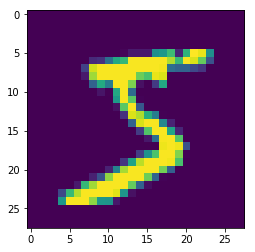

In [15]:
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
from original.dataset.mnist import load_mnist
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape)
img = img.reshape(28, 28) # 1次元で格納されているため, 28*28ピクセルに変換
plt.imshow(img)
print(img)
img_show(img)

In [22]:
"""
[ニューラルネットワークの実装]
入力層を784個, 出力層を１０個のニューロンで構成する.
出力層の10という数字は10クラス分類(数字の0~9の10クラス)から.
また, 隠れ層が2つあり, １つ目の隠れ層が50個, ２つの層が100個のニューロンを持つものとする.
"""
import pickle

def get_data():
    """テスト画像, テストラベルのタプルを返す"""
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    # 学習済みの重みパラメータを読み込み       
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

# 実行
x, t = get_data()
print("x shape:", x.shape)
print("t shape:", t.shape)
network = init_network()
print("network keys:", network.keys())

# 推論
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]: # 予測した答えと正解ラベルを比較
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

x shape: (10000, 784)
t shape: (10000,)
network keys: dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])
Accuracy:0.9352


In [17]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print("W1:", W1.shape)
print("W2:", W2.shape)
print("W3:", W3.shape)

(10000, 784)
W1: (784, 50)
W2: (50, 100)
W3: (100, 10)


In [18]:
"""
バッチ処理による実装
"""
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size] # batch_size分を抜き出す
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 0次元目ではなく, 1次元目の配列ごとに最大値のインデックスを見つける
    accuracy_cnt += np.sum(p == t[i : i + batch_size]) # 配列同士を比較し, Trueの個数を算出する

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352
